# Raw sEMG Signal Analysis

This notebook visualizes the raw sEMG signal to inspect baseline noise and DC offset.

## 1. Setup and Imports
We import the project modules from `src` and configure the plotting style.

In [7]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add project root to sys.path
sys.path.append(str(Path("..").resolve()))

from src import visualization, data_loader, config

# Initialize style (Checks config.ENABLE_LATEX)
visualization.set_plot_style()

Style set. LaTeX: False


## 2. Load Raw Data
We load the data preserving the DC offset to verify the 1.5V bias.

In [8]:
DATA_FILE = "../data/raw_signal.txt"

# Use constants from config
raw_voltage = data_loader.load_txt_signal_raw_offset(
    DATA_FILE, 
    v_ref=config.V_REF, 
    adc_bits=config.ADC_BITS
)

if raw_voltage is not None:
    time = np.arange(len(raw_voltage)) / config.FS
    print(f"Loaded {len(raw_voltage)} samples.")

Loaded 30706 samples.


## 3. Visualization
Plotting the raw signal voltage over time.

Saved [DRAFT]: ../results/drafts/raw_semg_signal.png


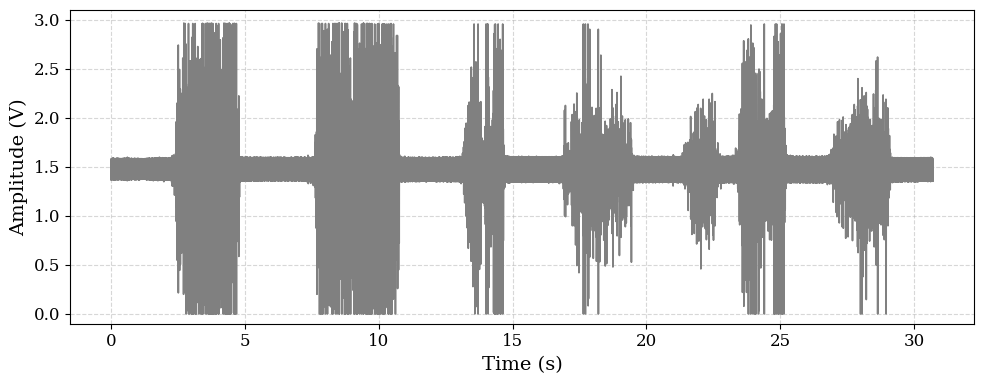

In [9]:
if raw_voltage is not None:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(time, raw_voltage, label='Raw Signal', color=visualization.COLORS['Raw Signal'])
    
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (V)")
    ax.set_ylim(-0.1, 3.1)
    
    visualization.save_fig(fig, 'raw_semg_signal.png')
    plt.show()